In [128]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Employee_Attrition_Data_Set.csv")

In [129]:
df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


# EDA

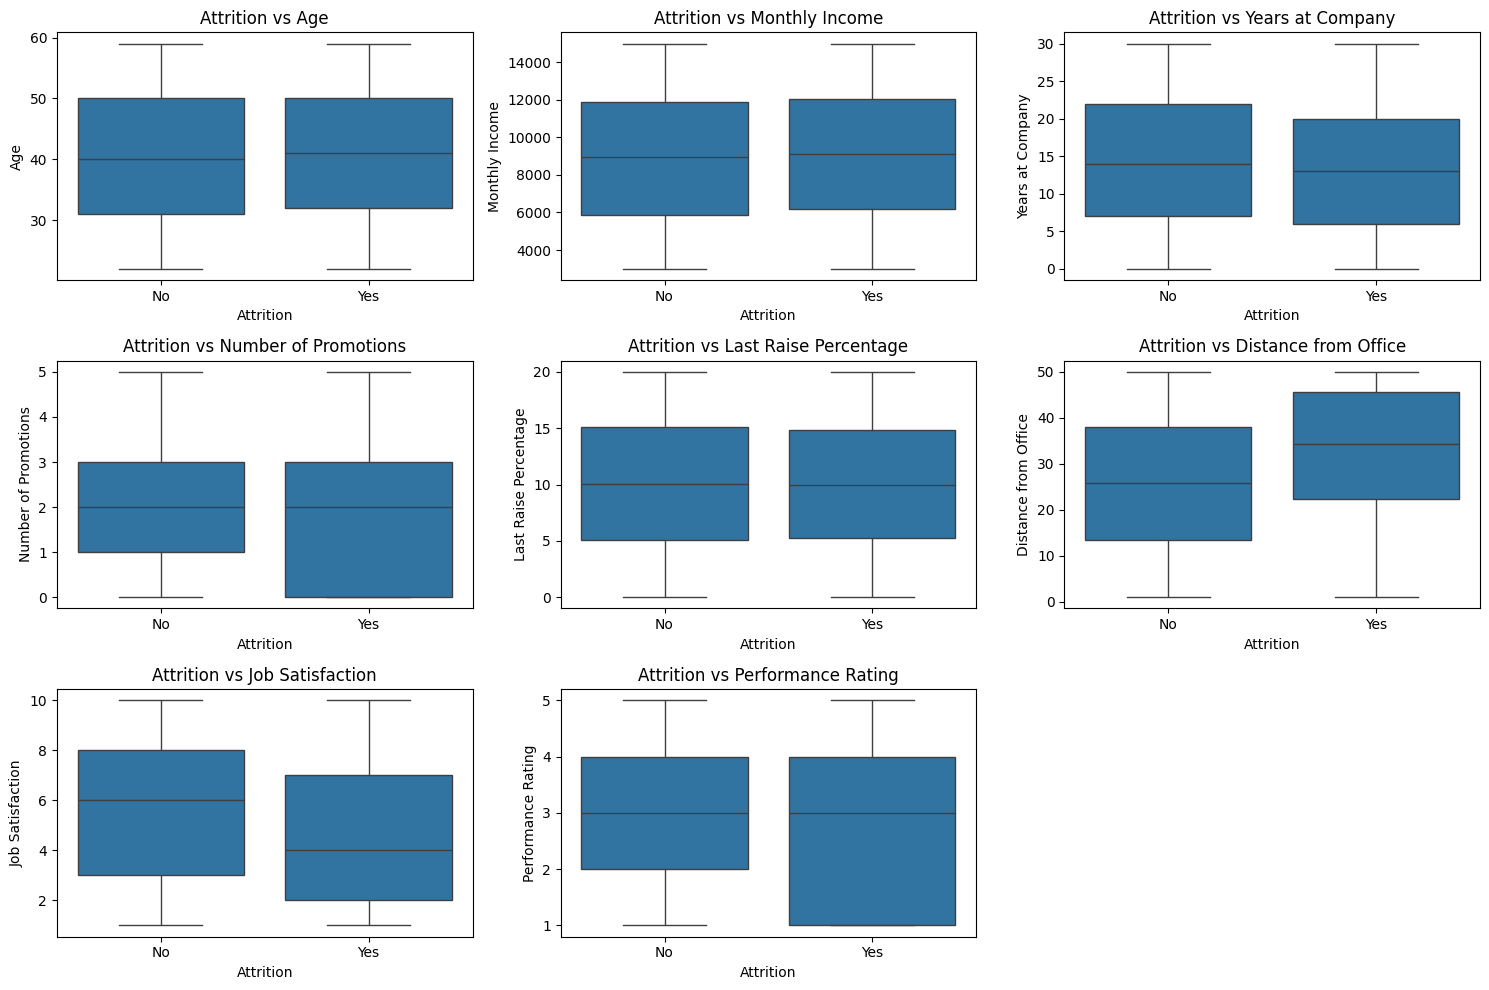

In [130]:
# Create a list of columns to plot against 'Attrition'
columns_to_plot = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 
                   'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction', 
                   'Performance Rating']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and create a box plot for each
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Attrition', y=column)
    plt.title(f'Attrition vs {column}')
    plt.tight_layout()

plt.show()

In [131]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

/var/folders/ft/gq7wv6zs1slgbv35cnp736j00000gp/T/ipykernel_45529/3911945517.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


In [135]:
# df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [136]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X = df[['Monthly Income', 'Years at Company', 'Age', 'Gender', 'Number of Promotions', 'Last Raise Percentage', 'Job Satisfaction','Performance Rating']]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [94]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
OneHotEncoder().fit_transform(df[['Gender', 'Department', 'Job Role', 'Attrition']])


from sklearn.compose import ColumnTransformer
categorical_columns = ['Gender', 'Department', 'Job Role', 'Attrition']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ]
)


In [137]:
df
class_counts = df['Attrition'].value_counts()
print("Class distribution:\n", class_counts)

Class distribution:
 Attrition
0    8597
1    1403
Name: count, dtype: int64


In [38]:
# we are going to test 3 models with cross validation to see which ones work best for this data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, PrecisionRecallDisplay


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)
nb = GaussianNB()
dt = DecisionTreeClassifier()
svc=SVC()

knn_scores = cross_val_score(knn, X_train, y_train, scoring= 'f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)
svc_scores = cross_val_score(svc,X_train, y_train, scoring='f1', cv=5)
dt_scores = cross_val_score(dt,X_train, y_train, scoring='f1', cv=5)


print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')
print(f'NB Classifier Mean F1 Score: {np.mean(nb_scores)}')
print(f'SVC Classifier Mean F1 Score: {np.mean(svc_scores)}')
print(f'DT Classifier Mean F1 Score: {np.mean(dt_scores)}')

Logistic Regression Mean F1 Score: 0.0
K-Nearest Neighbors Mean F1 Score: 0.04809737629018916
NB Classifier Mean F1 Score: 0.0
SVC Classifier Mean F1 Score: 0.0
DT Classifier Mean F1 Score: 0.1815616842325609


# Logistic Regression

In [102]:
# weighted in mode

logistic_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=10000)
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print(f'Logistic Regression - Accuracy: {accuracy}')
print(f'Logistic Regression - Precision: {precision}')
print(f'Logistic Regression - Recall: {recall}')
print(f'Logistic Regression - F1 Score: {f1}')
print(conf_matrix)
print(classification_report(y_test, y_pred_logistic))

Logistic Regression - Accuracy: 0.5756666666666667
Logistic Regression - Precision: 0.18022813688212927
Logistic Regression - Recall: 0.5486111111111112
Logistic Regression - F1 Score: 0.271322266742988
[[1490 1078]
 [ 195  237]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70      2568
           1       0.18      0.55      0.27       432

    accuracy                           0.58      3000
   macro avg       0.53      0.56      0.49      3000
weighted avg       0.78      0.58      0.64      3000



In [113]:
# weighted in result
logistic_reg = LogisticRegression(class_weight='balanced', random_state=42,max_iter=10000)
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic, average='weighted')
recall = recall_score(y_test, y_pred_logistic, average='weighted')
f1 = f1_score(y_test, y_pred_logistic, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print(f'Logistic Regression - Accuracy: {accuracy}')
print(f'Logistic Regression - Precision: {precision}')
print(f'Logistic Regression - Recall: {recall}')
print(f'Logistic Regression - F1 Score: {f1}')
print(conf_matrix)
print(classification_report(y_test, y_pred_logistic))

Logistic Regression - Accuracy: 0.5756666666666667
Logistic Regression - Precision: 0.7828905371709672
Logistic Regression - Recall: 0.5756666666666667
Logistic Regression - F1 Score: 0.6388540885177384
[[1490 1078]
 [ 195  237]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70      2568
           1       0.18      0.55      0.27       432

    accuracy                           0.58      3000
   macro avg       0.53      0.56      0.49      3000
weighted avg       0.78      0.58      0.64      3000



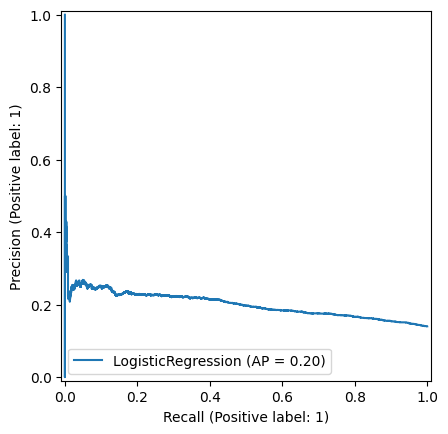

In [106]:
# Precision Recall Curve
display = PrecisionRecallDisplay.from_estimator(logistic_reg,X, y)


In [ ]:
# Calculate precision, recall, and thresholds
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
y_scores_logistic = logistic_reg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_logistic)
average_precision = average_precision_score(y_test, y_scores_logistic)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Logistic Regression (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

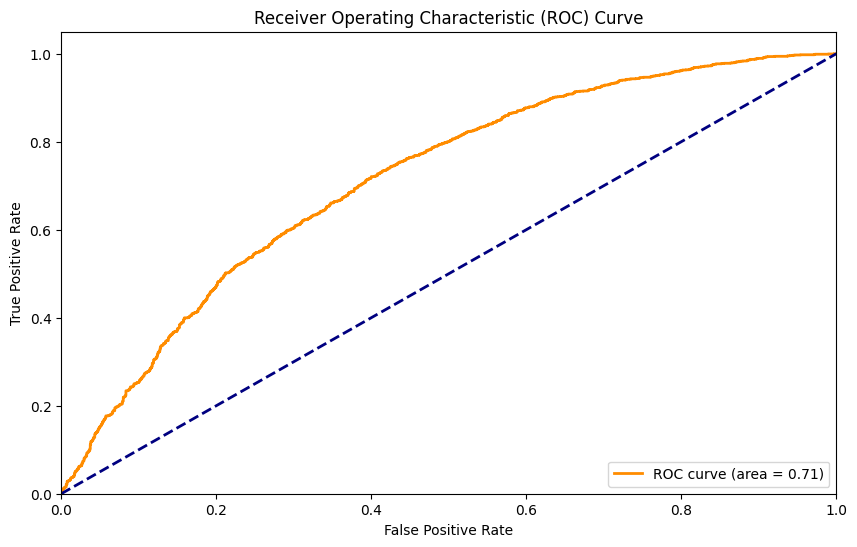

Text(0.5, 23.52222222222222, 'Predicted Classes')

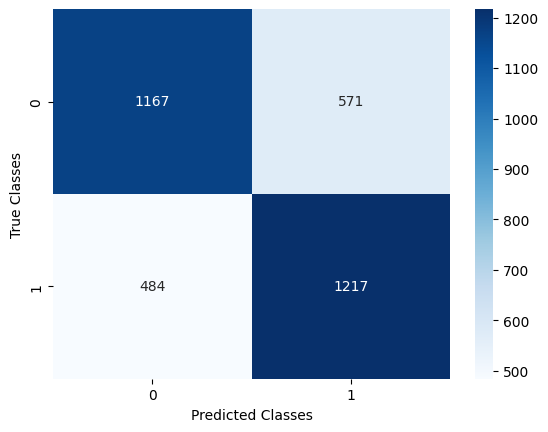

In [159]:
# Predict the probabilities for the positive class
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_prob_logistic = logistic_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob_logistic)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True,cmap='Blues',fmt='d')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')


In [157]:
probs = logistic_reg.predict_proba(X_test)
new_predictions =[]
for i in probs[:,1]:
    if i >= 0.55:
        new_predictions.append(1)
    else:
        new_predictions.append(0)

Text(0.5, 23.52222222222222, 'Predicted Classes')

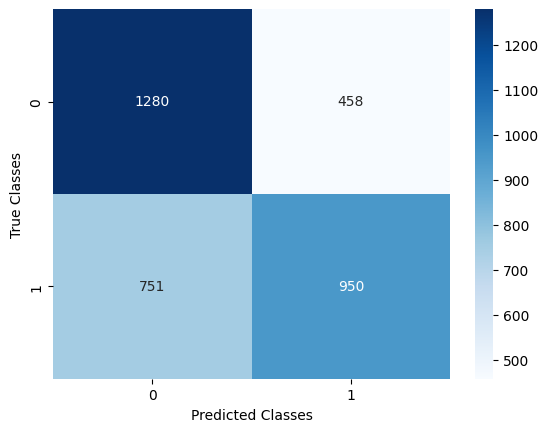

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, new_predictions), annot=True,cmap='Blues',fmt='d')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')

# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
# weighted in model
dt_reg = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print(f'Decision Tree - Accuracy: {accuracy}')
print(f'Decision Tree - Precision: {precision}')
print(f'Decision Tree - Recall: {recall}')
print(f'Decision Tree - F1 Score: {f1}')
print(conf_matrix)
print(classification_report(y_test, y_pred_dt))
# sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)

Decision Tree - Accuracy: 0.762
Decision Tree - Precision: 0.15942028985507245
Decision Tree - Recall: 0.1527777777777778
Decision Tree - F1 Score: 0.15602836879432624
[[2220  348]
 [ 366   66]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2568
           1       0.16      0.15      0.16       432

    accuracy                           0.76      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.76      0.76      0.76      3000



In [104]:
dt_reg = DecisionTreeClassifier()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print(f'Decision Tree - Accuracy: {accuracy}')
print(f'Decision Tree - Precision: {precision}')
print(f'Decision Tree - Recall: {recall}')
print(f'Decision Tree - F1 Score: {f1}')
print(conf_matrix)
print(classification_report(y_test, y_pred_dt))

Decision Tree - Accuracy: 0.753
Decision Tree - Precision: 0.7615143023944453
Decision Tree - Recall: 0.753
Decision Tree - F1 Score: 0.7571754310163753
[[2179  389]
 [ 352   80]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2568
           1       0.17      0.19      0.18       432

    accuracy                           0.75      3000
   macro avg       0.52      0.52      0.52      3000
weighted avg       0.76      0.75      0.76      3000



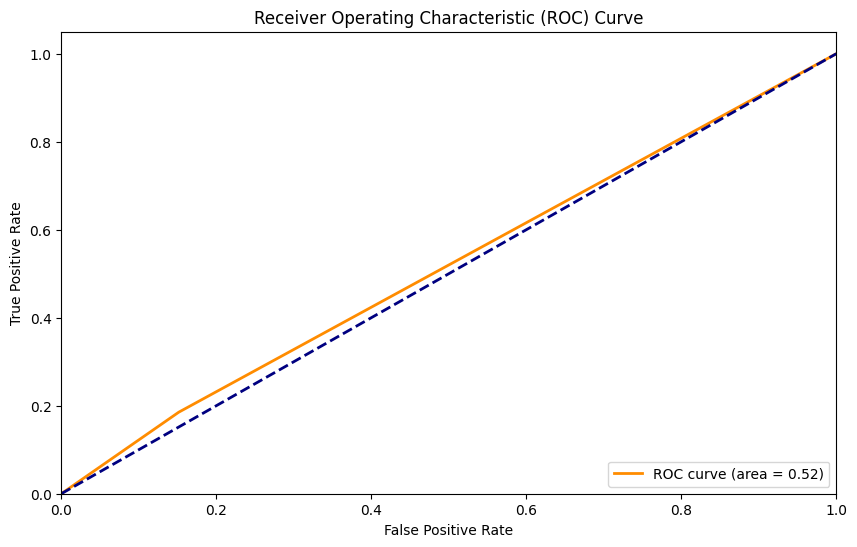

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the probabilities for the positive class
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_prob_dt = dt_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [142]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average= 'weighted')
recall = recall_score(y_test, y_pred_nb, average= 'weighted')
f1 = f1_score(y_test, y_pred_nb, average= 'weighted')

print(f'Naive Bayes - Accuracy: {accuracy:.2f}')
print(f'Naive Bayes - Precision: {precision:.2f}')
print(f'Naive Bayes - Recall: {recall:.2f}')
print(f'Naive Bayes - F1 Score: {f1:.2f}')
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes - Accuracy: 0.86
Naive Bayes - Precision: 0.73
Naive Bayes - Recall: 0.86
Naive Bayes - F1 Score: 0.79
[[2568    0]
 [ 432    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2568
           1       0.00      0.00      0.00       432

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.73      0.86      0.79      3000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Improvement

In [117]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best estimator from grid search
best_logistic_reg = grid_search.best_estimator_

# Predict on the test set
y_pred_logistic2 = best_logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic2)
precision = precision_score(y_test, y_pred_logistic2, average = 'weighted')
recall = recall_score(y_test, y_pred_logistic2, average = 'weighted')
f1 = f1_score(y_test, y_pred_logistic2, average = 'weighted')

print(f'Logistic Regression - Accuracy: {accuracy:.2f}')
print(f'Logistic Regression - Precision: {precision:.2f}')
print(f'Logistic Regression - Recall: {recall:.2f}')
print(f'Logistic Regression - F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred_logistic))

Logistic Regression - Accuracy: 0.58
Logistic Regression - Precision: 0.78
Logistic Regression - Recall: 0.58
Logistic Regression - F1 Score: 0.64
              precision    recall  f1-score   support

           0       0.88      0.58      0.70      2568
           1       0.18      0.55      0.27       432

    accuracy                           0.58      3000
   macro avg       0.53      0.56      0.49      3000
weighted avg       0.78      0.58      0.64      3000



ROC AUC: 0.7523825083600049


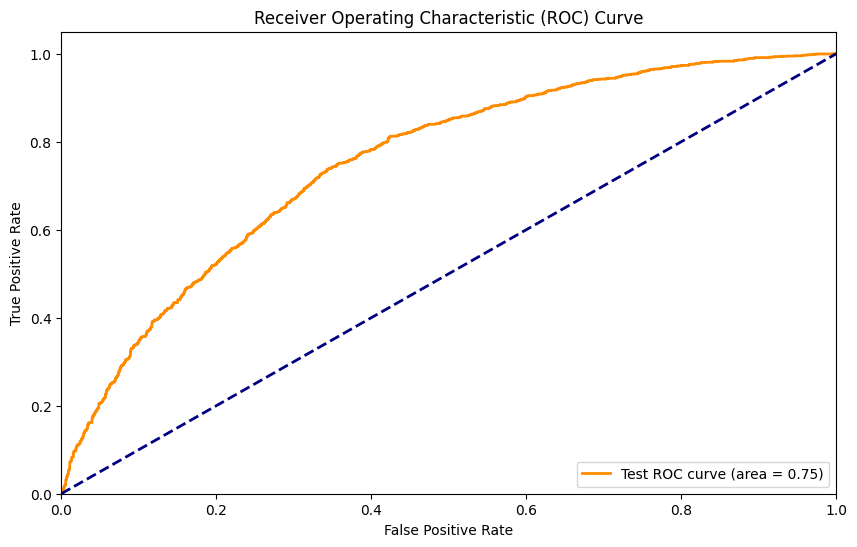

Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1738
           1       0.68      0.72      0.70      1701

    accuracy                           0.69      3439
   macro avg       0.69      0.69      0.69      3439
weighted avg       0.69      0.69      0.69      3439



In [153]:
from sklearn.preprocessing import PolynomialFeatures
# Improving the logistic regression model
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Train the best logistic regression model
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = best_model.predict(X_test)
y_prob_logistic = best_model.predict_proba(X_test)[:, 1]


# Evaluate the model on test data
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc}')

# Plot ROC curves for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print classification report for the test set
print("Logistic Regression Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Best parameters found for Decision Tree:  {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 16, 'min_samples_split': 17}
Best ROC AUC score for Decision Tree:  0.7883148622872078
Cross-validated ROC AUC scores for Decision Tree:  [0.65221126 0.8319064  0.81187802 0.8239177  0.82166093]
Mean cross-validated ROC AUC score for Decision Tree:  0.7883148622872078
Confusion Matrix for Decision Tree:
[[1221  517]
 [ 408 1293]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      1738
           1       0.71      0.76      0.74      1701

    accuracy                           0.73      3439
   macro avg       0.73      0.73      0.73      3439
weighted avg       0.73      0.73      0.73      3439



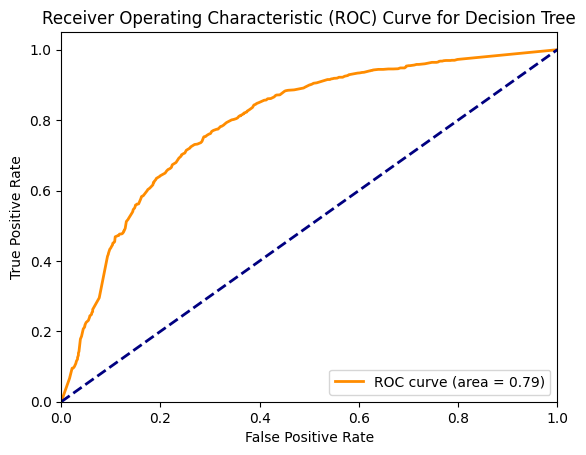

In [151]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
# Define the parameter grid for Decision Tree
param_dist_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'class_weight': ['balanced', None]
}
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Initialize the RandomizedSearchCV object for Decision Tree
random_search_tree = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_tree, 
                                        n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)

# Fit the random search model for Decision Tree
random_search_tree.fit(X_resampled, y_resampled)

# Print the best parameters and best score for Decision Tree
print("Best parameters found for Decision Tree: ", random_search_tree.best_params_)
print("Best ROC AUC score for Decision Tree: ", random_search_tree.best_score_)

# Use the best estimator for predictions
best_tree = random_search_tree.best_estimator_

# Perform cross-validation
cv_scores_tree = cross_val_score(best_tree, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores for Decision Tree: ", cv_scores_tree)
print("Mean cross-validated ROC AUC score for Decision Tree: ", cv_scores_tree.mean())

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model
best_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = best_tree.predict(X_test)
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

# Evaluate the Decision Tree model
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))

# Generate and plot the ROC curve for Decision Tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Quality of Data: The dataset may have inherent limitations, such as noise, irrelevant features, or insufficiently diverse samples, which constrain the model's ability to learn more effectively.

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_


best_knn.fit(X_train, y_train)


y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(f'KNN Classifier - Accuracy: {accuracy}')
print(f'KNN Classifier - Precision: {precision}')
print(f'KNN Classifier - Recall: {recall}')
print(f'KNN Classifier - F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(classification_report(y_test, y_pred_knn))

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True,cmap='Blues',fmt='d')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')